# <center>CEBoosting: Causation Entropy Boosting<center>
This jupyter notebook provide an overview and application of causation entropy boosting (CEBoosting).

For dynamical systems with regime switching, CEBoosting aims to online (i) identify regime switching and 
    (ii) learn model for new regime.

More details and information could be found in the paper: [CEBoosting: Online Sparse Identification of Dynamical Systems with Regime Switching by Causation Entropy Boosting](https://arxiv.org/abs/2304.07863)

## Problem Setting

The dynamical system has the following general form:
\begin{equation}
    \dot{\textbf{x}}(t) = \textbf{f}(\textbf{x}(t)) + \boldsymbol{\sigma} \dot{\textbf{W}}(t),
\label{eq:system} \tag{1}
\end{equation}

where $\textbf{x}(t)=[x_1(t),x_2(t),\ldots,x_p(t)]^\top \in \mathbb{R}^p$ is the multi-dimensional state variable and $\dot{\textbf{x}}(t) \in \mathbb{R}^p$ is the associated temporal derivative, $\textbf{f}:\ \mathbb{R}^p \mapsto \mathbb{R}^p$ is a vector-valued nonlinear function (i.e., vector field) of the state variable, $\dot{\textbf{W}}(t) \in \mathbb{R}^q$ is a white noise vector and $\boldsymbol{\sigma} \in \mathbb{R}^{p \times q}$ is a matrix of noise magnitudes.

Assume that the regime switching occurs at $t=t_s$, i.e., the vector field $\textbf{f}$ of the original dynamical system changes to $\textbf{f}^*$. The goal of this work is to detect such a regime switching and to identify the new model after the regime switching.




## Sparse Structure
With $\boldsymbol{\Phi}=[\phi_1,\phi_2,...,\phi_N]^\top$ be a vector containing all candidate basis functions, which are knowledge-based and are pre-determined, the deterministic part of dynamical system in \eqref{eq:system} could be represented as:

\begin{equation}
\label{eq:discretized_system} \tag{2}
    \dot{\textbf{x}} 
    =
    \begin{bmatrix}
        \dot{x}_1(t) \\
        \dot{x}_2(t) \\
        \vdots \\
        \dot{x}_p(t)
    \end{bmatrix}
     =
    \begin{bmatrix}
        \xi_{1,1} \quad \cdots \quad \xi_{1,N} \\
        \xi_{2,1} \quad \cdots \quad \xi_{2,N} \\
        \vdots \quad \ddots \quad \vdots \\
        \xi_{p,1} \quad \cdots \quad \xi_{p,N}
    \end{bmatrix}
    \begin{bmatrix}
        \phi_1(x_1(t),...,x_p(t)) \\
        \phi_2(x_1(t),...,x_p(t)) \\
        \vdots \\
        \phi_N(x_1(t),...,x_p(t)) \\
    \end{bmatrix}  = \boldsymbol{\Xi}\boldsymbol{\Phi}
.
\end{equation}

where $\boldsymbol{\Xi}$ is the sparse coefficient matirx.



## Causation Entropy
The causation entropy for dynamical systems in sparse matrix form \eqref{eq:discretized_system} is defined as 
\begin{equation}
\label{eq:C} \tag{3}
    C_{\phi_n \rightarrow \dot{x}_i|[\boldsymbol{\Phi} \setminus \phi_n]} = H(\dot{x}_i | [\boldsymbol{\Phi} \setminus \phi_n]) - H(\dot{x}_i | \boldsymbol{\Phi}),
\end{equation}
where $H(\cdot|\cdot)$ is the conditional entropy, which is defined as:
\begin{equation}
\label{eq:cond_entropy} 
    H(V|U) = \int_u \int_v p(u,v)\log(p(v|u))\mathrm{d} v\mathrm{d} u,
\end{equation}


The causation entropy $C_{\phi_n \rightarrow \dot{x}_i|[\boldsymbol{\Phi} \setminus \phi_n]}$ is utilized to quantify the contribution from the candidate function $\phi_n$ to the dynamics $\dot{x}_i$ (i.e., the time derivative of the $i$-th state variable: $x_i$) conditioned on the remaining candidate functions $\boldsymbol{\Phi} \setminus \phi_n$, namely all the candidate functions except $\phi_n$. This causation entropy reflects the causal influence of $\phi_n$ to the dynamics $\dot{x}_i$, and we enforce $\xi_{in}=0$ if the causation entropy is small. Repeating this procedure over all $n=1,\ldots, N$ and $i=1,\ldots,p$ to form the matrix $\boldsymbol{\Xi}$. As only a few candidate functions will have the actual causal influence on the dynamics, the matrix $\boldsymbol{\Xi}$ is expected to have a sparse structure.

In practice, by approximating all the joint and marginal distributions as Gaussians, the causation entropy is calculated as follows:

\begin{equation}
\label{eq:C_gaussian} \tag{4}
\begin{aligned}
    C_{W \rightarrow U|V} &= H(U|V) - H(U|V,W) \\
    &= H(U,V) - H(V) - H(U,V,W) + H(V,W) \\
    &= \frac{1}{2}\ln(\det(\mathbf{R}_{UV})) - \frac{1}{2}\ln(\det(\mathbf{R}_{V})) - \frac{1}{2}\ln(\det(\mathbf{R}_{UVW})) + \frac{1}{2}\ln(\det(\mathbf{R}_{VW})),
\end{aligned}
\end{equation}
where $\mathbf{R}$ denotes the covariance matrix of the corresponding vector, e.g., $\mathbf{R}_{UVW}$ corresponds to the covariance matrix of the vector $[U,V,W]^\top$.

After applying a proper threshold value $\overline{C}$,  a causation entropy matrix (CEM) $\mathbf{C}$ is obtained, where its $(i,n)$-th entry is given by:
\begin{equation}
\label{eq:threshold} \tag{5}
    \mathbf{C}_{in} =
    \begin{cases}
        0 \quad \text{if $C_{\phi_n \rightarrow \dot{x}_i|[\boldsymbol{\Phi} \setminus \phi_n]} \leq \overline{C}$}, \\
        1 \quad \text{if $C_{\phi_n \rightarrow \dot{x}_i|[\boldsymbol{\Phi} \setminus \phi_n]} > \overline{C}$}.
    \end{cases}
\end{equation}
Based on the matrix $\mathbf{C}$, the sparsity can be further enforced into $\boldsymbol{\Xi}$ by setting $\xi_{in}=0$ when $\mathbf{C}_{in}=0$.

## Causation Entropy Boosting

Instead of learning the entire model associated with the new regime $\textbf{f}^*$, the focus is to model the residual dynamics $\delta \textbf{f}=\textbf{f}^*-\textbf{f}$. Once the sparse coefficient matrix of residual dynamics $\delta \textbf{f}$ is identified and estimated, it is then be added to the existing model that provides the new system as a response to the regime switching. 

Assume that by exploiting all the past batch data $\textbf{x}(t)$ for $t \in [0,t_{B_{1}})$, the model in the current regime is estimated as: $\boldsymbol{\Xi}^{(0)}\boldsymbol{\Phi}$. With a new incoming data batch $\textbf{x}(t)$ for $t \in [t_{B_1},t_{B_{2}})$, the true dynamics $\dot{\textbf{x}}$ within this period can be obtained by differentiation of $\textbf{x}(t)$. On the other hand, the predicted dynamics using the current model is given by $\dot{\tilde{\textbf{x}}} = \boldsymbol{\Xi}^{(0)}\boldsymbol{\Phi}$. Then the residual dynamics $\delta \textbf{f}$ for the $1$-st batch is given by $\textbf{r} = \dot{\textbf{x}} -\dot{\tilde{\textbf{x}}}$. As an analog to \eqref{eq:discretized_system}, the sparse matrix form of residual dynamics can be written as:
\begin{equation}
\label{eq:residual_system} \tag{6}
    \textbf{r} 
    =
    \begin{bmatrix}
        r_1(t) \\
        r_2(t) \\
        \vdots \\
        r_p(t)
    \end{bmatrix}
     =
    \begin{bmatrix}
        \delta\xi_{1,1} \quad \cdots \quad \delta\xi_{1,N} \\
        \delta\xi_{2,1} \quad \cdots \quad \delta\xi_{2,N} \\
        \vdots \quad \ddots \quad \vdots \\
        \delta\xi_{p,1} \quad \cdots \quad \delta\xi_{p,N}
    \end{bmatrix}
    \begin{bmatrix}
        \phi_1(x_1(t),...,x_p(t)) \\
        \phi_2(x_1(t),...,x_p(t)) \\
        \vdots \\
        \phi_N(x_1(t),...,x_p(t)) \\
    \end{bmatrix}  = \boldsymbol{\Xi}_r\boldsymbol{\Phi}.
\end{equation}

To detect regime switching, identify sparse pattern of $\boldsymbol{\Xi}_r$ and estimate the rest of parameters of $\boldsymbol{\Xi}_r$ in \eqref{eq:residual_system}, one can estimate the causation entropy $C_{\phi_n \rightarrow r_i|[\boldsymbol{\Phi} \setminus \phi_n]}$ between basis of states $\boldsymbol{\Phi}$ and residual dynamics $\textbf{r}$ according to \eqref{eq:C} and \eqref{eq:threshold}, and then obtain the corresponding causation entropy matrix $\mathbf{C}$ by \eqref{eq:threshold}. Mathematically, if $\mathbf{C} = \textbf{0}$, it implies that no variable in the basis functions $\boldsymbol{\Phi}$ is significant to the residual dynamics $\textbf{r}$, which leads to $\boldsymbol{\Xi}_r=\textbf{0}$ in \eqref{eq:residual_system}. In other words, the current model $\boldsymbol{\Xi}^{(0)}\boldsymbol{\Phi}$ fits the dynamics of $1$-st batch and make residual dynamics $\textbf{r}$ behave like white noise. This means there is no regime switching ($\delta \textbf{f} =\textbf{0} $) if $\mathbf{C} = \textbf{0}$ and the model is unchanged. Otherwise, if $\mathbf{C}$ contains some non-zero terms, then a regime switching occurs ($\delta \textbf{f} \neq \textbf{0} $), and the goal is to identify the sparse structure of the $\boldsymbol{\Xi}_r$ in \eqref{eq:residual_system}. 
    
However, despite the mathematical justification, with a limited amount of data in each batch, the true sparse structure of $\delta \textbf{f}$ cannot be accurately identified. It is often the case that $\mathbf{C}$ contains multiple entries that are nonzero due to the sampling error from the short time series. This means if directly imposing the sparsity into $\boldsymbol{\Xi}_r$ based on the CEM $\mathbf{C}$ computed from such a short single-batch data may lead to an incorrect residual system $\boldsymbol{\Xi}_r\boldsymbol{\Phi}$. To resolve such a sampling problem, we introduce aggregated CEM $\mathbf{C}^+(K)$ based on the average of the causation entropy from a series of data batches:
\begin{equation}
    \label{eq:C+} \tag{7}
    \mathbf{C}^+(K) =
    \begin{cases}
        0 \quad \text{if $\frac{1}{K}\sum_{k=1}^{K}C^{(k)}_{\phi_n \rightarrow r_i|[\boldsymbol{\Phi} \setminus \phi_n]} \leq \overline{C}$}, \\
        1 \quad \text{if $\frac{1}{K}\sum_{k=1}^{K}C^{(k)}_{\phi_n \rightarrow r_i|[\boldsymbol{\Phi} \setminus \phi_n]} > \overline{C}$}.
    \end{cases}
\end{equation}
Denote by $D$ the number of batches with which the aggregated CEM has not changed, namely
\begin{equation}
\label{eq:C_criterion} \tag{8}
    \mathbf{C}^+(K) = \mathbf{C}^+(K-d), \quad \text{for all $d=1,2,...,D-1$}.
\end{equation}



In the CEBoosting algorithm, $D$ is a hyper-parameter and needs to be pre-determined. We further define a stable aggregated causation entropy matrix $\overline{\mathbf{C}^+}=\mathbf{C}^+(K^*)$ with the smallest $K^*$ that satisfies the criterion in \eqref{eq:C_criterion}.With this stable aggregated causation entropy matrix $\overline{\mathbf{C}^+}$, we then impose sparsity into $\boldsymbol{\Xi}_r$ by setting $\delta\xi_{in}=0$ when $\overline{\mathbf{C}^+}_{in}=0$ and extract a set of remaining coefficients $\boldsymbol{\Xi}_r =\{\delta\xi_{in}|\overline{\mathbf{C}^+}_{in}=1\}$.

Once the sparsity is imposed into $\boldsymbol{\Xi}_r$ for extracting a set of remaining coefficients, a model $\boldsymbol{\Xi}_r\boldsymbol{\Phi}$ in \eqref{eq:residual_system} can be calibrated based on the accumulated batches of data $\textbf{x}(t)$ for $t \in [t_{B_1},t_{B_{K^*+1}})$. Assume a discrete approximation of the continuous data with a fixed time step $\Delta t$ such that $t_{B_{k+1}}-t_{B_k}=M\Delta t$ for any $k$. The model calibration is performed by solving the following least squares problem:
\begin{equation}
\label{eq:optim_single} \tag{9}
    {arg\,min}_{\boldsymbol{\Xi}_r} \sum_{m=1}^{MK^*}\|\textbf{r}(t_{B_1}+m\Delta t) - \boldsymbol{\Xi}_r\boldsymbol{\Phi}(t_{B_1}+(m-1)\Delta t) \|^2,
\end{equation}
where $\|\cdot\|$ denotes the vector norm in $\mathbb{R}^p$. Note that the method also works with adaptive time steps, and the assumption of a fixed time step in \eqref{eq:optim_single} is for the simplicity of the illustration.

After the sparse parameter matrix $\boldsymbol{\Xi}_r$ for residual dynamics model \eqref{eq:residual_system} is obtained, the current model $\boldsymbol{\Xi}^{(0)}$ is updated by adding the information from the residual dynamics $\boldsymbol{\Xi}_r$. The CEBoosting algorithm repeats the above procedure when a new batch of data arrives.

## Example of Lorenz 63 system

The governing equation of Lorenz 63 system is: 

\begin{equation}
\begin{aligned}
&\frac{\mathrm{d} x}{\mathrm{d} t} = \sigma (y-x), \\
&\frac{\mathrm{d} y}{\mathrm{d} t} = x(\rho -z)  - y,\\
&\frac{\mathrm{d} z}{\mathrm{d} t} = xy - \beta z.
\end{aligned}
\end{equation}

In [10]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Implementaton of calculation for causation Entropy with eq (4). 

This function is used to calculate the causation entropy between (residual) dynamics and states basis.

In [11]:
# Causation Entropy Utility Function

def cem(X, Y):

    causation_entropy = np.zeros((Y.shape[0], X.shape[0]))

    for k in range(Y.shape[0]):
        all_variables = np.concatenate((X, Y[[k]]))
        RXYZ = np.cov(all_variables)
        RXYZ_det = np.linalg.det(RXYZ)
        RYZ = RXYZ[:-1, :-1]
        RYZ_det = np.linalg.det(RYZ)

        for i in range(X.shape[0]):
            RXY = np.delete(np.delete(RXYZ, i, axis=0), i, axis=1)
            RXY_det = np.linalg.det(RXY)
            RY = np.delete(np.delete(RYZ, i, axis=0), i, axis=1)
            RY_det = np.linalg.det(RY)

            causation_entropy[k, i] = 1/2 * (np.log(RXY_det) - np.log(RY_det) - np.log(RXYZ_det) + np.log(RYZ_det))

    return causation_entropy


Create basis functions $\boldsymbol{\Phi}$ for observed states $\textbf{x}$

In [12]:
# State Basis Functions Construction

def basis(x, y, z):
    return np.stack([x, y, z, x*y, y*z, x*z, x**2, y**2, z**2])[:, :-1]


Simulation data from regime 1. The simulation settings is listed in the code.

In [13]:
# Original Regime and Model

np.random.seed(0)

Lt = 100
dt = 0.001
N = int(Lt/dt)
sigma = 10
rho = 28
beta = 8/3
sigma_x = 1
sigma_y = 1
sigma_z = 1
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0] = 0
y[0] = 0
z[0] = 0

for i in range(1, N):
    x[i] = x[i-1] + sigma*(y[i-1]-x[i-1])*dt + sigma_x*np.sqrt(dt)*np.random.randn()
    y[i] = y[i-1] + (x[i-1]*(rho-z[i-1]) - y[i-1])*dt + sigma_y*np.sqrt(dt)*np.random.randn()
    z[i] = z[i-1] + (x[i-1]*y[i-1] - beta*z[i-1])*dt + sigma_z*np.sqrt(dt)*np.random.randn()



With the data from regime 1, we obtain the original (current) model by 1) calculating causation entropy matrix for regime 1 data, 2) imposing sparsity into parameter matrix, and 3) estimating non-zero parameter matrix with least square. The sparse coefficient matrix of original model in regime 1 is shown below.

In [14]:
state_basis = basis(x, y, z)
dynamics = np.stack([np.diff(x)/dt, np.diff(y)/dt, np.diff(z)/dt])
causation_entropy = cem(state_basis, dynamics)
threshold = 3e-04
causation_entropy_binary = causation_entropy > threshold

original_model = np.zeros((3, 9))
for i in range(3):
    X_data = state_basis[causation_entropy_binary[i]].T
    y_data = dynamics[i]
    original_model[i, causation_entropy_binary[i]] = np.linalg.inv(X_data.T @ X_data)@X_data.T@y_data

    
original_model.round(2)

array([[-9.98,  9.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [28.19, -1.06,  0.  ,  0.  ,  0.  , -1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -2.67,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

Simulation data from regime 2: at the end of trajectory from regime 1, the parameter $\rho$ switch from 28 to 38 with other simulation settings retain the same.

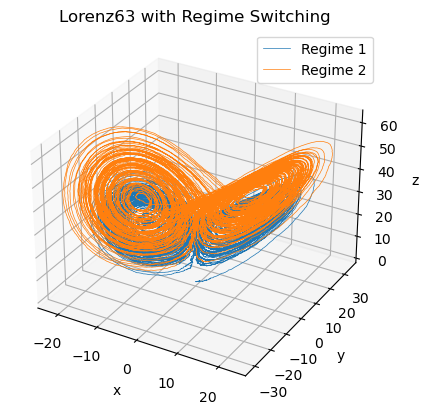

In [15]:
# New Regime

rho = 38
x_new = np.zeros(N)
y_new = np.zeros(N)
z_new = np.zeros(N)
x_new[0] = x[-1]
y_new[0] = y[-1]
z_new[0] = z[-1]

for i in range(1, N):
    x_new[i] = x_new[i-1] + sigma*(y_new[i-1] - x_new[i-1])*dt + sigma_x*np.sqrt(dt)*np.random.randn()
    y_new[i] = y_new[i-1] + (x_new[i-1]*(rho-z_new[i-1])-y_new[i-1])*dt + sigma_y*np.sqrt(dt)*np.random.randn()
    z_new[i] = z_new[i-1] + (x_new[i-1]*y_new[i-1]-beta*z_new[i-1])*dt + sigma_z*np.sqrt(dt)*np.random.randn()

    

ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, label="Regime 1", linewidth=0.5)
ax.plot3D(x_new, y_new, z_new, label="Regime 2", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz63 with Regime Switching")
ax.legend()

With the initial sequential data batch from regime 2, we begin by deriving the true dynamics, predicted dynamics, and residual dynamics. Subsequently, we compute the causation entropy between the residual dynamics and observed states. Notably, some elements of the causation entropy matrix for the first batch are conspicuously greater than 0, suggesting a high relevance of certain variables in the basis to the residual dynamics. This observation contradicts the assumption that the residual dynamics should resemble white noise if the current model effectively predicts new data batches. Consequently, we infer that the first incoming batch does not belong to the original regime (regime 1).

Due to the shortage of data, the causation entropy from one single batch may not be accurate. Therefore, we proceed to calculate and average the causation entropy of the succeeding incoming batches to stabilize the causation entropy. A hyper-parameter $D$ is set to signify that the causation entropy pattern remains consistent for the subsequent $D-1$ batches. By the 8th batch, the causation entropy pattern is successfully identified, with position (2,1) designated as 1, while all other terms are set to 0.

In [16]:
D = 4 # Hyper-parameter
counter = 0
causation_entropy_binary_pre = np.full((3, 9), np.inf)
threshold_new = 1.2e-3
batch_length = 1000
batch_heads = np.arange(0, N, batch_length)
causation_entropy_accumulator = np.zeros((3,9))

for idx in range(100):
    print("===== batch " + str(idx+1) + " =====")
    x_new_batch = x_new[batch_heads[idx]:batch_heads[idx]+batch_length]
    y_new_batch = y_new[batch_heads[idx]:batch_heads[idx]+batch_length]
    z_new_batch = z_new[batch_heads[idx]:batch_heads[idx]+batch_length]

    state_basis_batch = basis(x_new_batch, y_new_batch, z_new_batch)
    predictions_batch = original_model @ state_basis_batch
    dynamics_batch = np.stack([np.diff(x_new_batch)/dt, np.diff(y_new_batch)/dt, np.diff(z_new_batch)/dt])
    residual_batch = dynamics_batch - predictions_batch

    causation_entropy_batch = cem(state_basis_batch, residual_batch)
    causation_entropy_accumulator += causation_entropy_batch
    causation_entropy_average = causation_entropy_accumulator / (idx+1)
    print(causation_entropy_average.round(4))

    causation_entropy_binary = (causation_entropy_average > threshold_new).astype(int)
    if (causation_entropy_binary == causation_entropy_binary_pre).all() & ~(causation_entropy_binary==0).all():
        counter += 1
    else:
        counter = 0

    if counter == D-1:
        break

    causation_entropy_binary_pre = causation_entropy_binary

detect_point = idx+1
    
print("\nIdentified causation entropy pattern for residual dynamics:")
print(causation_entropy_binary)

print("\nNumber of bathces required to complete identification:", str(detect_point))


===== batch 1 =====
[[0.0005 0.0005 0.0004 0.0001 0.0003 0.0005 0.0008 0.0003 0.0005]
 [0.0024 0.0005 0.0003 0.     0.0003 0.0006 0.0004 0.0004 0.0003]
 [0.0003 0.0001 0.0001 0.0002 0.0001 0.0004 0.0001 0.0003 0.0001]]
===== batch 2 =====
[[0.0015 0.0016 0.0013 0.0014 0.0015 0.0015 0.0016 0.0016 0.0013]
 [0.0013 0.0003 0.0003 0.0001 0.0002 0.0004 0.0003 0.0003 0.0002]
 [0.0002 0.0001 0.0001 0.0001 0.0001 0.0002 0.     0.0001 0.    ]]
===== batch 3 =====
[[0.0013 0.0013 0.0011 0.0012 0.0012 0.0012 0.0013 0.0013 0.0012]
 [0.001  0.0003 0.0003 0.0001 0.0002 0.0003 0.0002 0.0003 0.0002]
 [0.0001 0.0001 0.     0.0001 0.     0.0001 0.     0.0001 0.    ]]
===== batch 4 =====
[[0.001  0.001  0.0009 0.0009 0.0009 0.0009 0.001  0.001  0.0009]
 [0.0007 0.0003 0.0003 0.0001 0.0002 0.0002 0.0002 0.0004 0.0003]
 [0.0001 0.0001 0.     0.0001 0.0001 0.0001 0.     0.0001 0.    ]]
===== batch 5 =====
[[0.0011 0.001  0.0011 0.0011 0.0009 0.001  0.0012 0.0009 0.0011]
 [0.0013 0.0002 0.0003 0.0001 0.0002 0

With identified causation entropy pattern, we impose sparsity into parameter matrix of residual model and then estimate non-zero terms by least square method. Finally, we add the residual model on original model to obtain the corrected model for new regime (regime 2).

In [17]:
# Residual Model & Correctd Model

causation_entropy_binary = causation_entropy_binary.astype(bool)

x_new_detect = x_new[:detect_point*batch_length]
y_new_detect = y_new[:detect_point*batch_length]
z_new_detect = z_new[:detect_point*batch_length]

state_basis_new = basis(x_new_detect, y_new_detect, z_new_detect)
dynamics_new = np.stack([np.diff(x_new_detect)/dt, np.diff(y_new_detect)/dt, np.diff(z_new_detect)/dt])
predictions_new = original_model @ state_basis_new
residual_new = dynamics_new - predictions_new

residual_model = np.zeros((3, 9))
for i in range(3):
    X_data = state_basis_new[causation_entropy_binary[i]].T
    y_data = residual_new[i]
    residual_model[i, causation_entropy_binary[i]] = np.linalg.inv(X_data.T @ X_data)@X_data.T@y_data

print("Residual Model is:")
print(residual_model.round(4))
print("\n")

corrected_model = original_model + residual_model
print("Corrected Model is:")
print(corrected_model.round(4))

Residual Model is:
[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [10.0826  0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]]


Corrected Model is:
[[-9.9783  9.9891  0.      0.      0.      0.      0.      0.      0.    ]
 [38.2716 -1.0577  0.      0.      0.     -1.0046  0.      0.      0.    ]
 [ 0.      0.     -2.6662  0.9996  0.      0.      0.      0.      0.    ]]


Comparison of predictions of $\dot{y}$ from original model and corrected model for the first batch of regime 2 data.

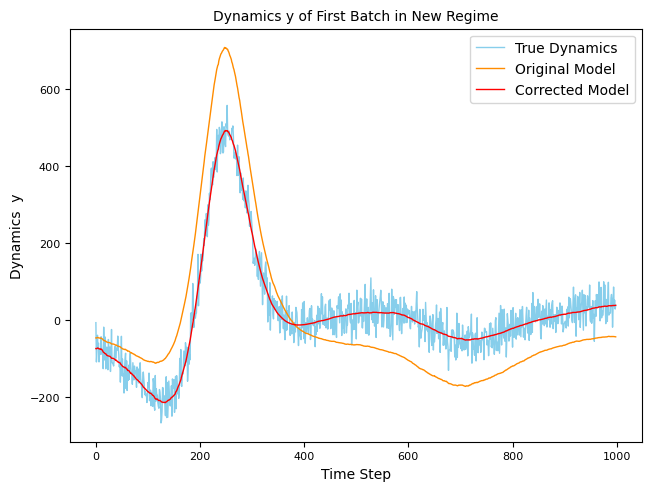

In [18]:
# Prediction of first batch with original and corrected model

x_new_batch1 = x_new[:batch_length]
y_new_batch1 = y_new[:batch_length]
z_new_batch1 = z_new[:batch_length]
state_basis_batch1 = basis(x_new_batch1, y_new_batch1, z_new_batch1)
dynamics_batch1 = np.stack([np.diff(x_new_batch1)/dt, np.diff(y_new_batch1)/dt, np.diff(z_new_batch1)/dt])
predictions_original_batch1 = original_model @ state_basis_batch1
predictions_corrected_batch1 = corrected_model @ state_basis_batch1

residual_original_batch1 = dynamics_batch1 - predictions_original_batch1
residual_corrected_batch1 = dynamics_batch1 - predictions_corrected_batch1


fig = plt.figure(layout="constrained")
ax = fig.subplots()
ax.plot(dynamics_batch1[1], linewidth=1, label="True Dynamics", color="skyblue")
ax.plot(predictions_original_batch1[1],linewidth=1, label="Original Model", color="darkorange")


ax.plot(predictions_corrected_batch1[1],linewidth=1, label="Corrected Model", color="red")
ax.set_title("Dynamics y of First Batch in New Regime", fontsize=10)
ax.set_xlabel("Time Step", fontsize=10)
ax.set_ylabel("Dynamics  y", fontsize=10)
ax.legend(fontsize=10)
ax.tick_params(labelsize=8)
